In [1]:
# Import Libraries
import pandas as pd

1. LOAD DATA

In [2]:
# Load the housing data into DataFrame
df = pd.read_csv('./data/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# 2. EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
# Descriptive Statistics
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [4]:
# Descriptive Statics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
# Shape of the DataFrame
df.shape

(5000, 7)

In [6]:
# Check missing values
m_values = df.isnull().sum()
print(m_values)
m_values = m_values[m_values > 0]
print(f'\n Values: {m_values}')

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

 Values: Series([], dtype: int64)


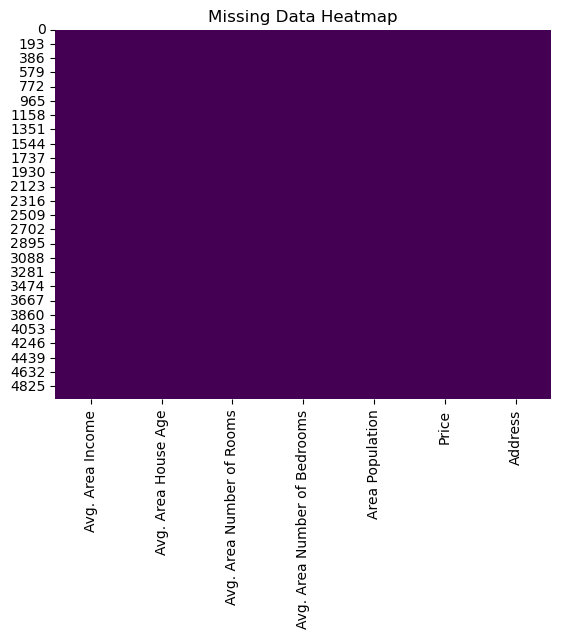

In [7]:
# Visualize the Missing Data
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

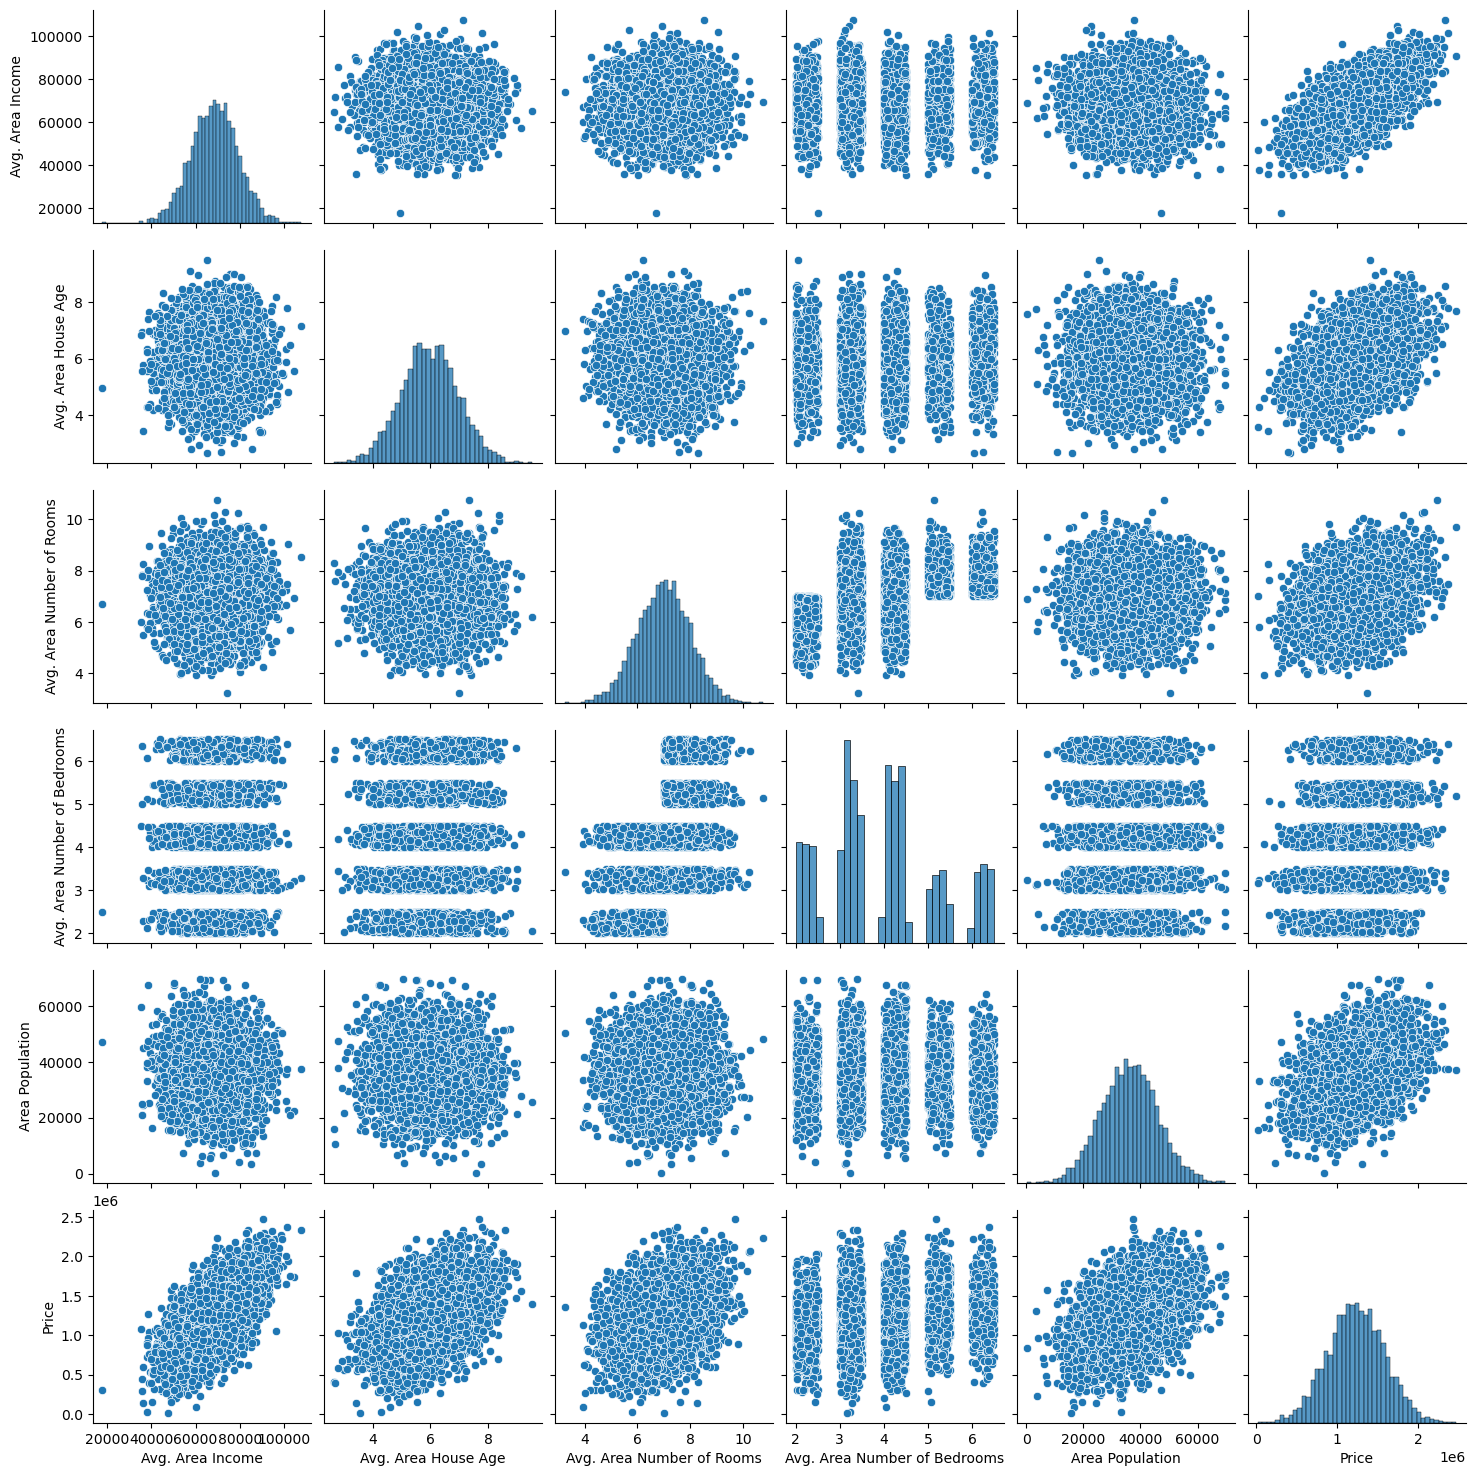

In [8]:
# Visualize relationship between features with pair plot
sns.pairplot(df)
plt.show()


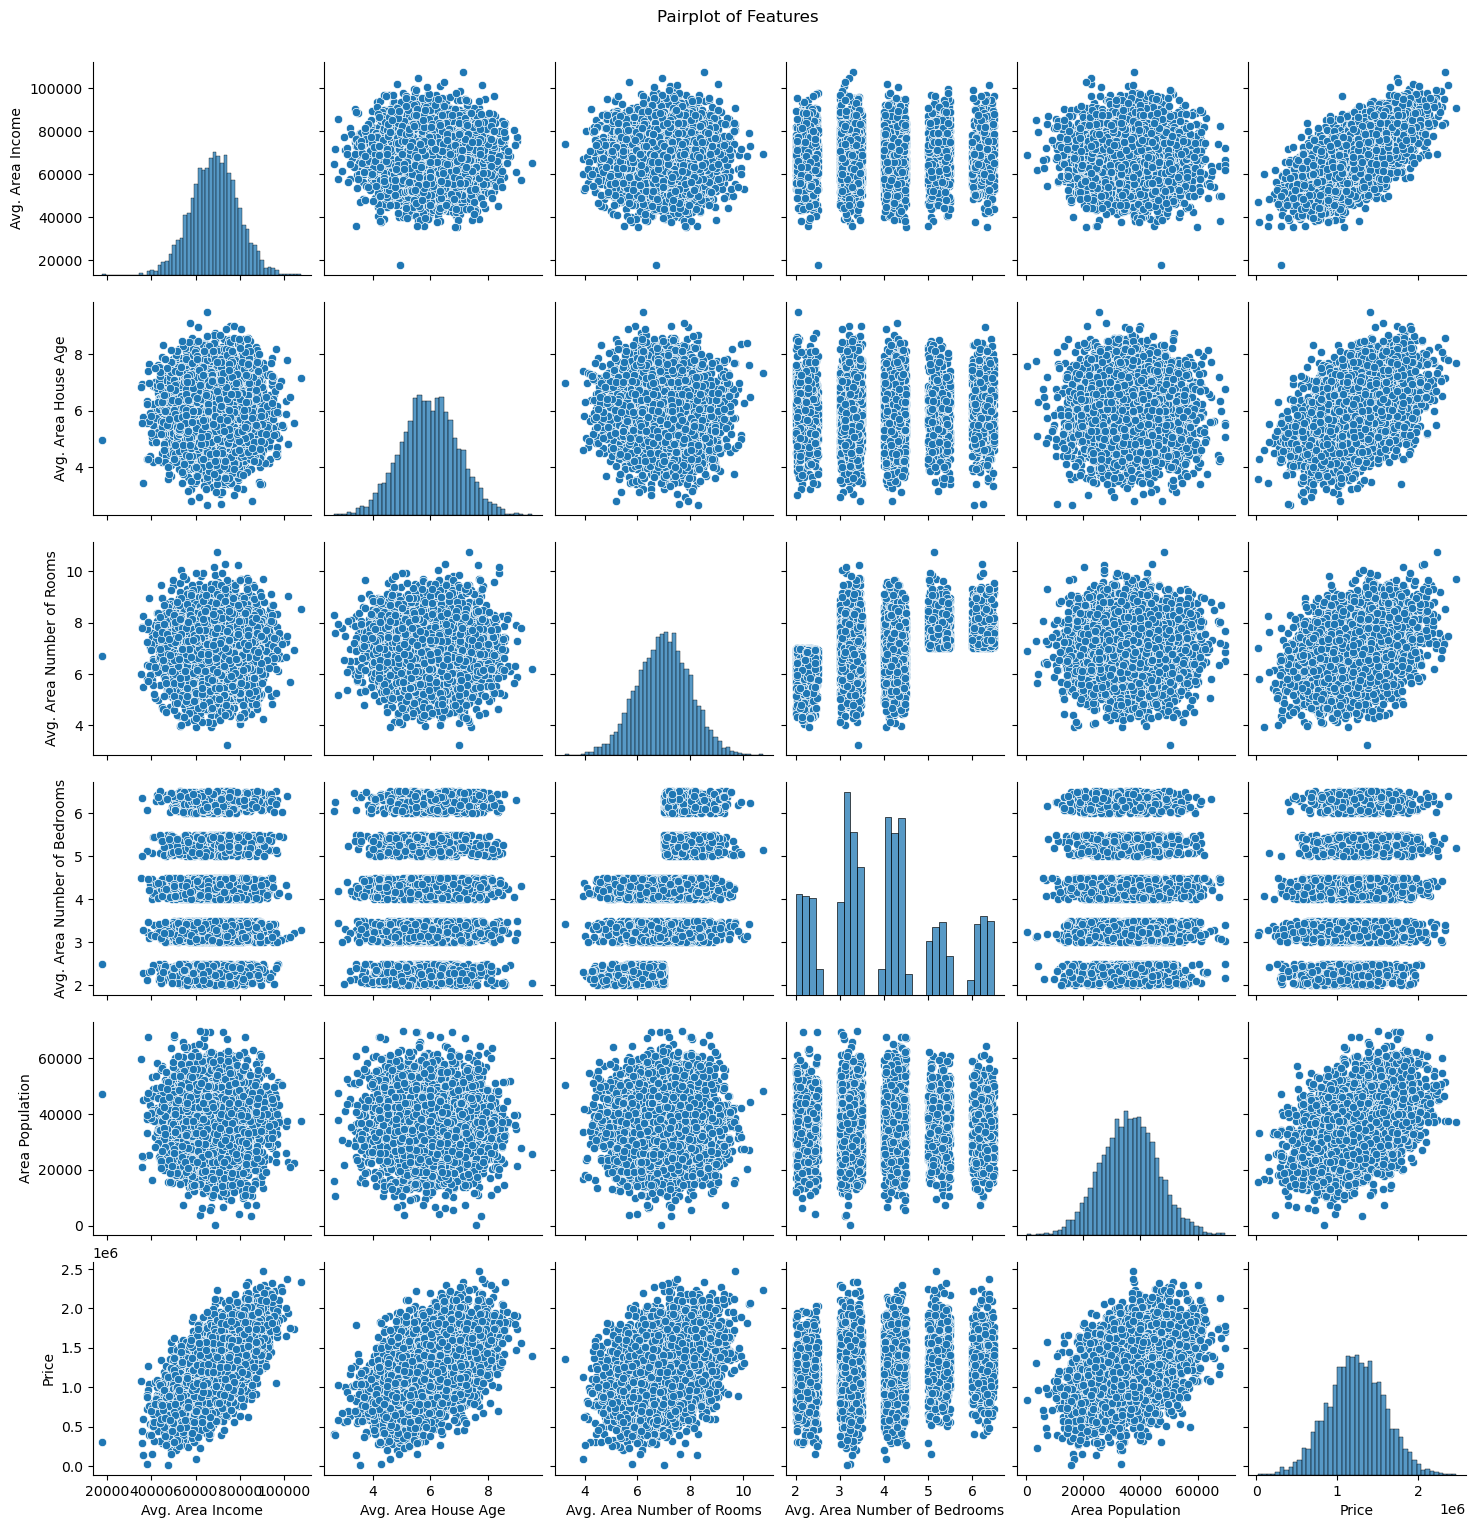

In [9]:
def eda_pairplot(df, hue=None):
    """Generate a pairplot of the DataFrame features."""
    sns.pairplot(df, hue=hue)
    plt.suptitle("Pairplot of Features", y=1.02)
    plt.show()
eda_pairplot(df)

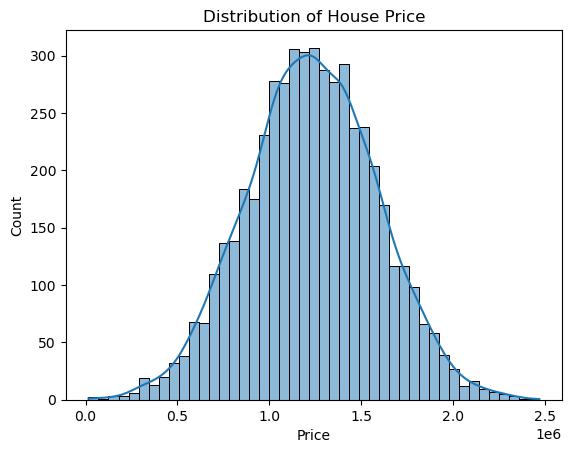

In [10]:
# Plot distribution of the target variable
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of House Price')
plt.show()

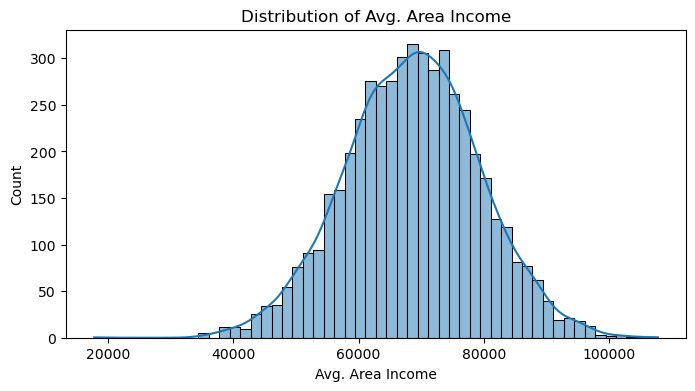

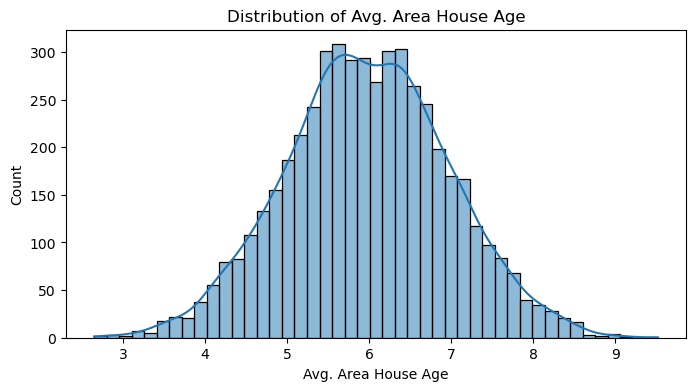

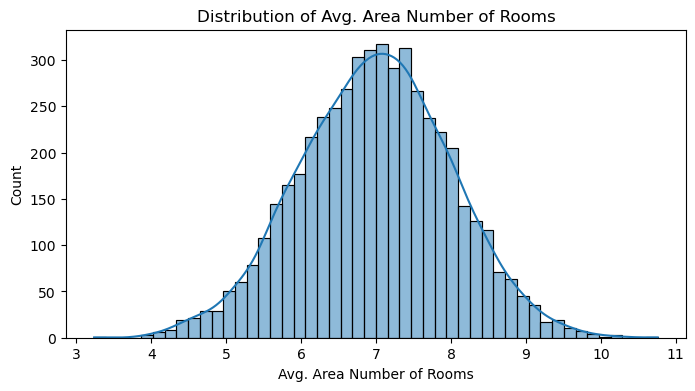

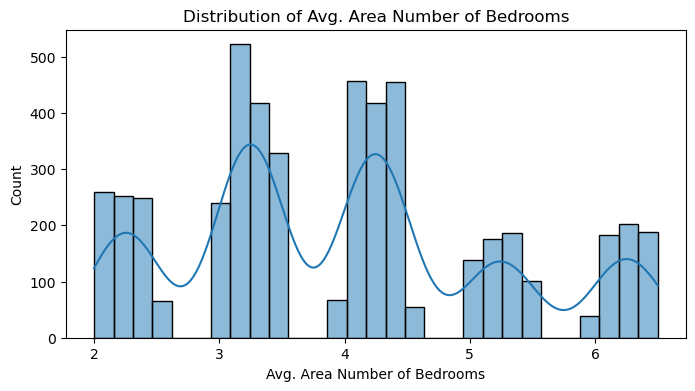

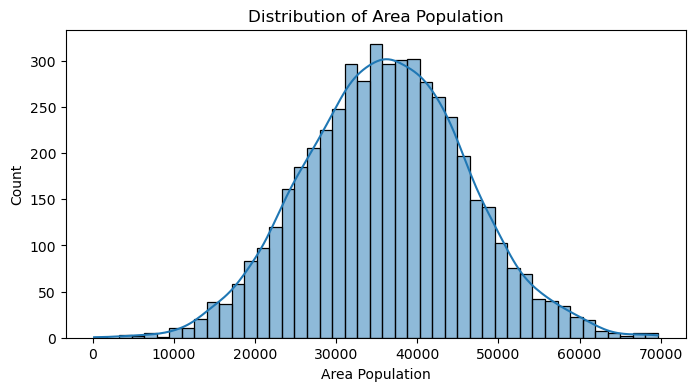

In [11]:
# Visualize the distribution of individual features
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and col != 'Price':
        plt.figure(figsize=(8,4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

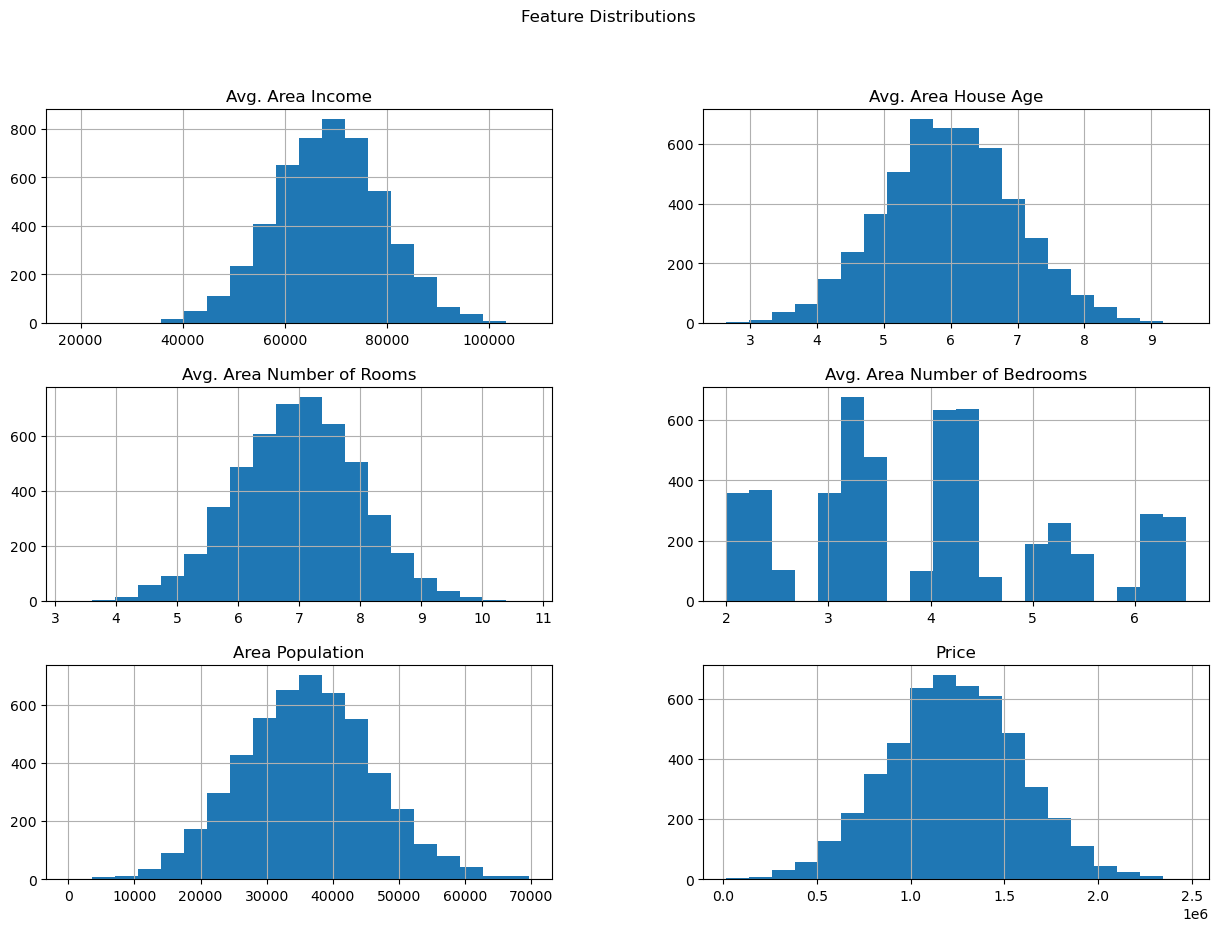

In [12]:
def eda_visualize_distributions(df):
    """Visualize the distribution of features using histograms."""
    df.hist(bins=20, figsize=(15, 10))
    plt.suptitle("Feature Distributions")
    plt.show()
eda_visualize_distributions(df)

In [13]:
# Feature Selection
df = df.drop(['Address'], axis=1)

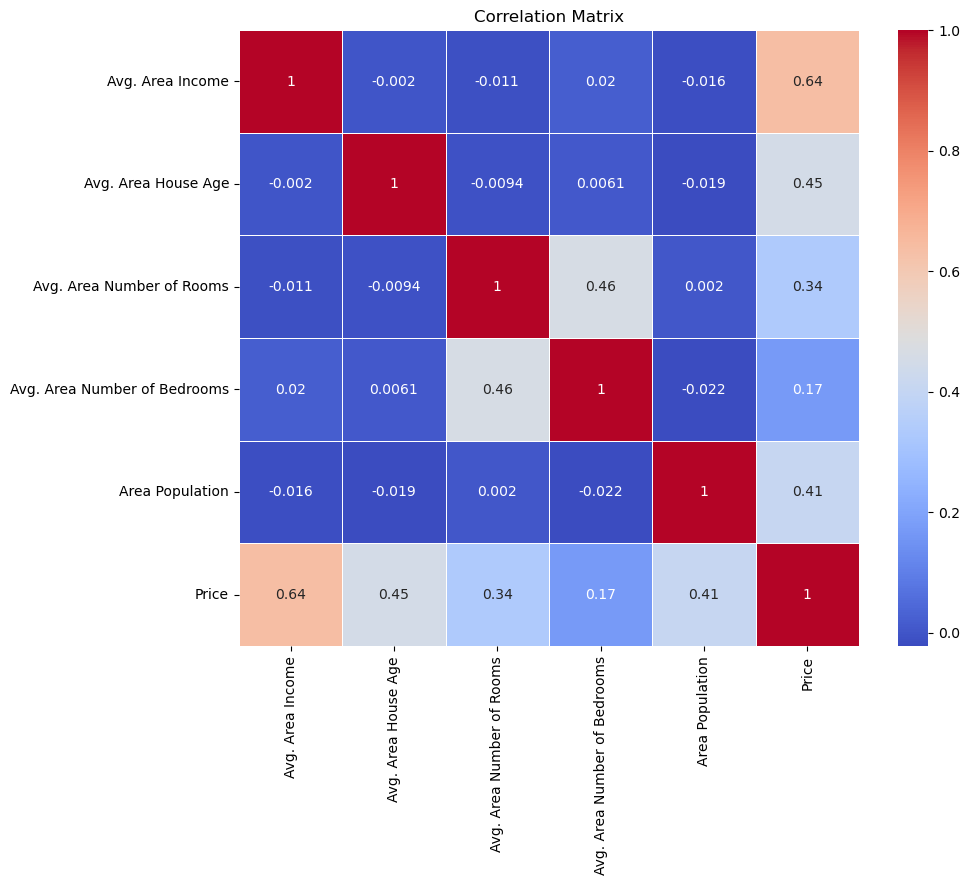

In [14]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10,8))
cmx = df.corr()
sns.heatmap(cmx, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

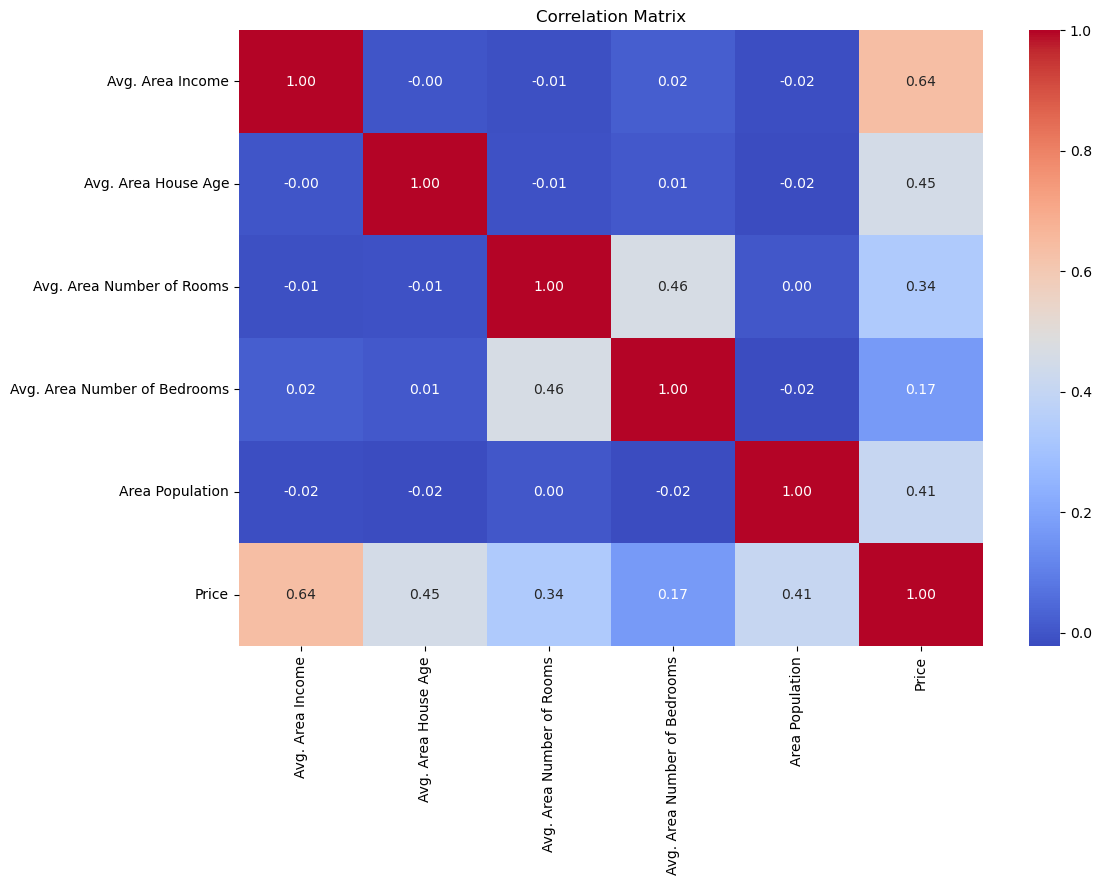

In [15]:
def eda_correlation_matrix(df):
    """Generate and visualize the correlation matrix."""
    corr_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

eda_correlation_matrix(df)

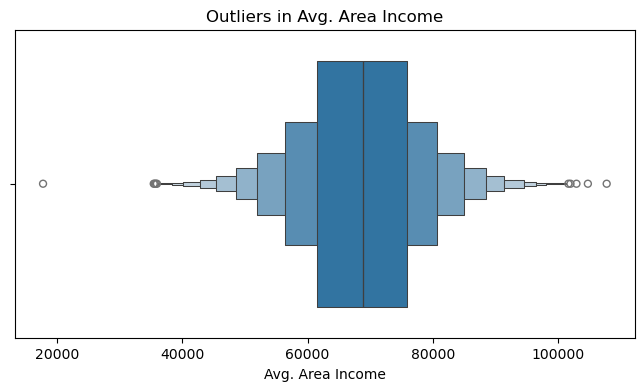

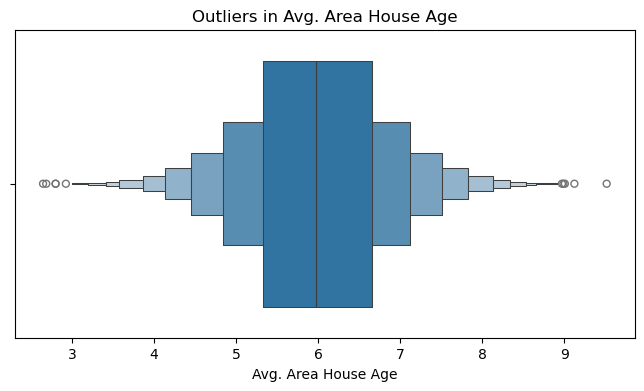

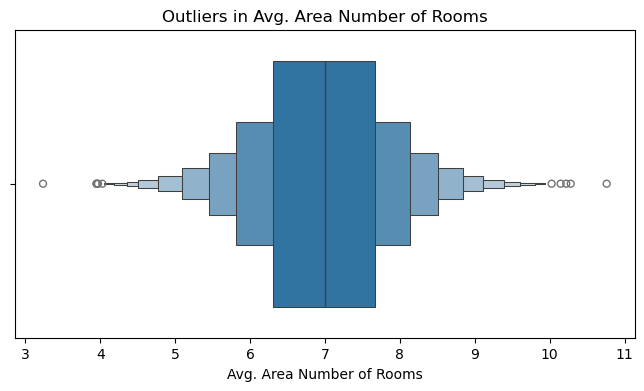

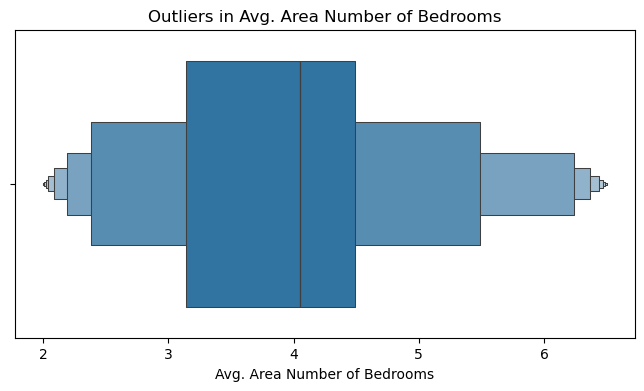

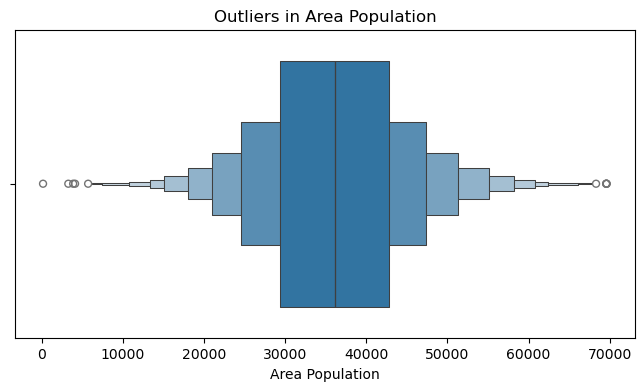

In [16]:
# Outlier Detection using Boxplot
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and col != 'Price':
        plt.figure(figsize=(8,4))
        sns.boxenplot(x=df[col])
        plt.title(f'Outliers in {col}')
        plt.show()

# 3 FEATURE ENGINEERING

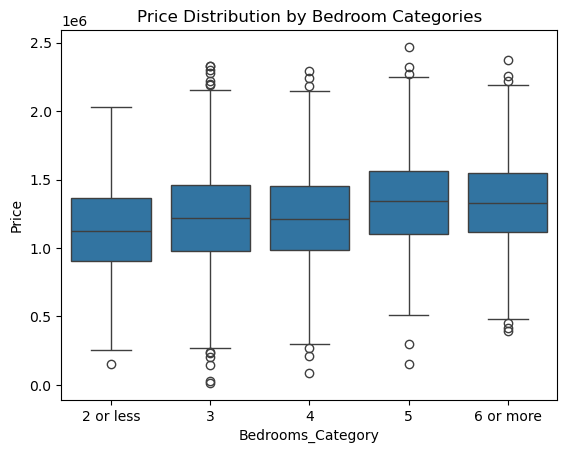

In [17]:
# 1. Investigate Subgroups or Categories

df['Bedrooms_Category'] = pd.cut(df['Avg. Area Number of Bedrooms'], bins=[1, 2.5, 3.5, 4.5, 5.5, 6.5], labels=['2 or less', '3', '4', '5', '6 or more'])
sns.boxplot(x='Bedrooms_Category', y='Price', data=df)
plt.title("Price Distribution by Bedroom Categories")
plt.show()


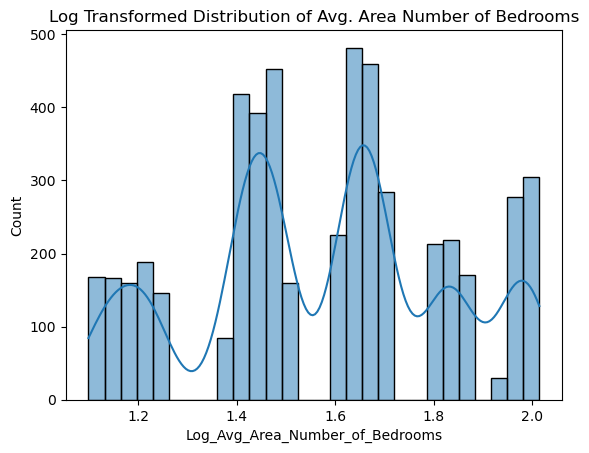

In [18]:
# 2. Feature Transformation
import numpy as np
df['Log_Avg_Area_Number_of_Bedrooms'] = np.log1p(df['Avg. Area Number of Bedrooms'])
sns.histplot(df['Log_Avg_Area_Number_of_Bedrooms'], kde=True)
plt.title("Log Transformed Distribution of Avg. Area Number of Bedrooms")
plt.show()


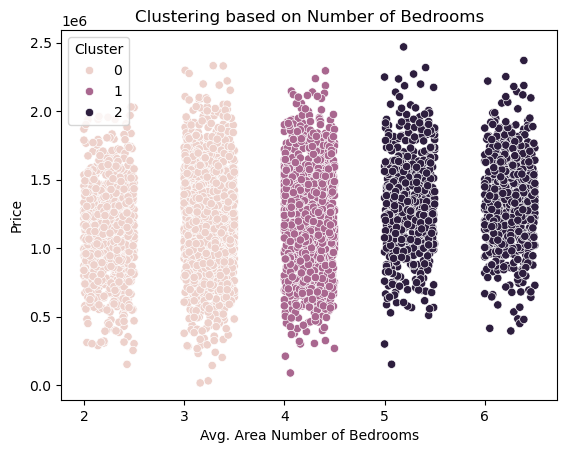

In [19]:
# 3. Apply Clustering Techniques

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Avg. Area Number of Bedrooms']])
sns.scatterplot(x='Avg. Area Number of Bedrooms', y='Price', hue='Cluster', data=df)
plt.title("Clustering based on Number of Bedrooms")
plt.show()


In [20]:
# Room to Bedroom Ratio
df['Room2Bedroom_ratio'] = df['Avg. Area Number of Rooms'] / df['Avg. Area Number of Bedrooms']

In [21]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price',
       'Bedrooms_Category', 'Log_Avg_Area_Number_of_Bedrooms', 'Cluster',
       'Room2Bedroom_ratio'],
      dtype='object')

In [22]:
# Define dict witht the old names as key and kew shoter names as value
rename_col = {
    'Avg. Area Income': 'Avg_Income',
    'Avg. Area House Age': 'House_Age',
    'Avg. Area Number of Rooms': 'Avg_Rooms',
    'Avg. Area Number of Bedrooms': 'Avg_Bedrooms',
    'Area Population': 'Population',
    'Price': 'Price',
    'Bedrooms_Category': 'Bed_Category',
    'Log_Avg_Area_Number_of_Bedrooms': 'Log_Avg_Bedrooms',
    'Cluster': 'Cluster',
    'Room2Bedroom_ratio': 'Room_Bed_Ratio'
}
# Rename the columns using the rename() method
df.rename(columns=rename_col, inplace=True)
df.columns

Index(['Avg_Income', 'House_Age', 'Avg_Rooms', 'Avg_Bedrooms', 'Population',
       'Price', 'Bed_Category', 'Log_Avg_Bedrooms', 'Cluster',
       'Room_Bed_Ratio'],
      dtype='object')

In [23]:
# Handle Outliers
def handle_outliers(df, columns=None, lower_quantile=0.01, upper_quantile=0.99):
    """Handle outliers by capping them at the specified quantiles"""
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns by default
    
    for col in columns:
        q1 = df[col].quantile(lower_quantile)
        q3 = df[col].quantile(upper_quantile)
        df[col] = np.clip(df[col], q1, q3)
        print(f'Outliers in {col} capped between {lower_quantile*100}% and {upper_quantile*100}% quantiles.')
    
    return df

# Specify columns you want to handle, or leave as None to handle all numeric columns
columns_to_handle = ['Price', 'Avg_Income', 'House_Age', 'Avg_Rooms']  # Replace with your relevant columns
df = handle_outliers(df, columns=columns_to_handle)

Outliers in Price capped between 1.0% and 99.0% quantiles.
Outliers in Avg_Income capped between 1.0% and 99.0% quantiles.
Outliers in House_Age capped between 1.0% and 99.0% quantiles.
Outliers in Avg_Rooms capped between 1.0% and 99.0% quantiles.


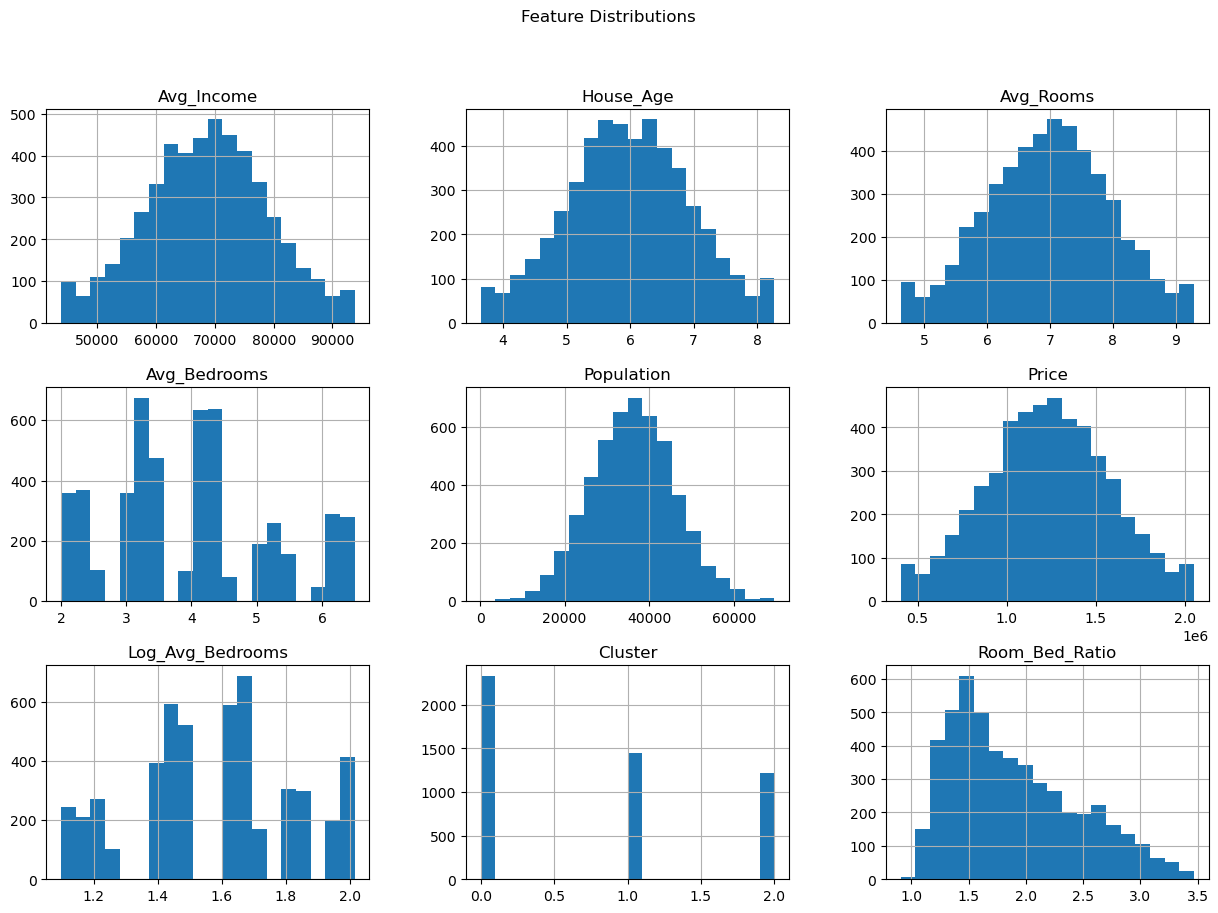

In [24]:
def eda_visualize_distributions(df):
    """Visualize the distribution of features using histograms."""
    df.hist(bins=20, figsize=(15, 10))
    plt.suptitle("Feature Distributions")
    plt.show()
eda_visualize_distributions(df)

# 4. PREPROCESSING

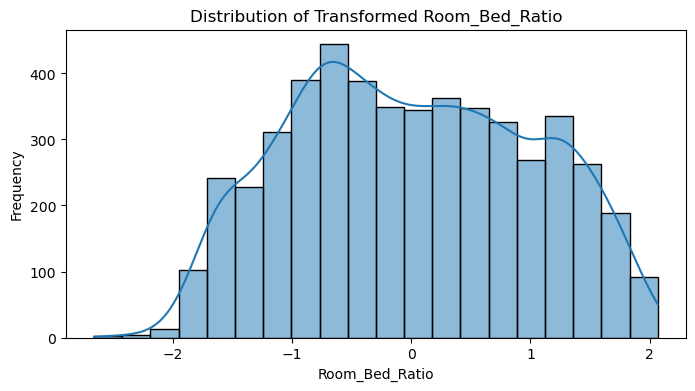

In [25]:
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, StandardScaler

# Apply transformations to the Room_Bed_Ratio feature
pt = PowerTransformer(method='yeo-johnson')
df['Room_Bed_Ratio'] = pt.fit_transform(df[['Room_Bed_Ratio']])

# Plot the histogram for the transformed Room_Bed_Ratio feature
plt.figure(figsize=(8, 4))
sns.histplot(df['Room_Bed_Ratio'], bins=20, edgecolor='black', kde=True)
plt.title('Distribution of Transformed Room_Bed_Ratio')
plt.xlabel('Room_Bed_Ratio')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Cluster', ylabel='Count'>

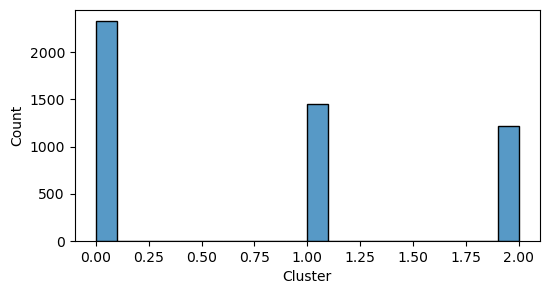

In [26]:
# One-Hot Encode the Cluster column
df['Cluster'] = df['Cluster'].astype('category').cat.codes

# Plotting the distribution of the 'Cluster' feature after encoding
plt.figure(figsize=(6,3))
sns.histplot(df['Cluster'], bins=20, kde=False)


<Axes: xlabel='Log_Avg_Bedrooms', ylabel='Count'>

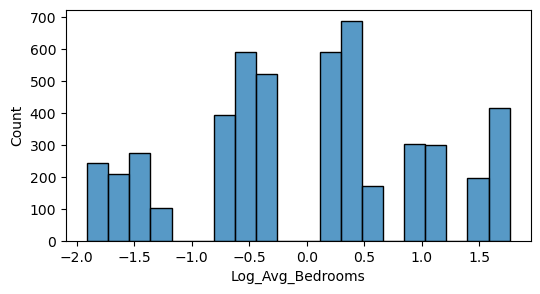

In [27]:
# Optionally scale the Log_Avg_Bedrooms and other numeric features
scaler = StandardScaler()
df[['Log_Avg_Bedrooms', 'Room_Bed_Ratio']] = scaler.fit_transform(df[['Log_Avg_Bedrooms', 'Room_Bed_Ratio']])

# Plot transform Avg Bedrooms
plt.figure(figsize=(6,3))
sns.histplot(df['Log_Avg_Bedrooms'], bins=20)

In [28]:
X = df.drop(['Price', 'Bed_Category'], axis=1)
y = df['Price']

In [29]:
# Check for Multicollinearity using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(f'\nVariance Inflation Factors (VIF): \n {vif_df}')


Variance Inflation Factors (VIF): 
             Feature         VIF
0        Avg_Income   43.311293
1         House_Age   38.181923
2         Avg_Rooms  624.247559
3      Avg_Bedrooms  689.185230
4        Population   14.274281
5  Log_Avg_Bedrooms   15.904447
6           Cluster   16.046510
7    Room_Bed_Ratio   45.821219


In [30]:
# Dropping one of the highly collinear features
X =X.drop(['Avg_Bedrooms', 'Avg_Rooms', 'Room_Bed_Ratio'], axis=1)

# Recalculate VIF to check the new situation
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(f'\nVariance Inflation Factors (VIF) after dropping features: \n{vif}')



Variance Inflation Factors (VIF) after dropping features: 
            Feature        VIF
0        Avg_Income  25.157274
1         House_Age  23.810734
2        Population  12.189132
3  Log_Avg_Bedrooms   5.774013
4           Cluster  10.950548


Since all of the features as VIF > 10, use Dimensionality Reduction Techbique like PCA or Regularization Techniques like L1 and L2

In [31]:
# Sacle the feature variablres to standardize them
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# PCA Implementation
from sklearn.decomposition import PCA
pca = PCA(n_components='mle', svd_solver='full') # 'mle' chooses the number of of  by MLE
X_pca = pca.fit_transform(X_scaled)

Choose Either PCA or PolynomialFearures

In [33]:
"""
def preprocess_data(df, apply_pca=False, n_components=None, poly_degree=2):
    #Prepares the feature matrix and target vector for model training.
    X = df.drop(['Price', 'Address'], axis=1, errors='ignore')
    y = df['Price']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X_scaled)
    print(f'PCA applied with {n_components} components.')
    transformer = pca
    
    print('Preprocessing data complete!')
    return X, y, X_reduced, transformer


def preprocess_data(df, apply_pca=False, n_components=None, poly_degree=2):
    #Prepares the feature matrix and target vector for model training.
    X = df.drop(['Price', 'Address'], axis=1, errors='ignore')
    y = df['Price']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
    X_reduced = poly.fit_transform(X_scaled)
    print(f'Polynomial features generated with degree {poly_degree}.')
    transformer = poly
        
    return X, y, X_reduced, 

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
"""

"\ndef preprocess_data(df, apply_pca=False, n_components=None, poly_degree=2):\n    #Prepares the feature matrix and target vector for model training.\n    X = df.drop(['Price', 'Address'], axis=1, errors='ignore')\n    y = df['Price']\n    \n    scaler = StandardScaler()\n    X_scaled = scaler.fit_transform(X)\n    \n    pca = PCA(n_components=n_components)\n    X_reduced = pca.fit_transform(X_scaled)\n    print(f'PCA applied with {n_components} components.')\n    transformer = pca\n    \n    print('Preprocessing data complete!')\n    return X, y, X_reduced, transformer\n\n\ndef preprocess_data(df, apply_pca=False, n_components=None, poly_degree=2):\n    #Prepares the feature matrix and target vector for model training.\n    X = df.drop(['Price', 'Address'], axis=1, errors='ignore')\n    y = df['Price']\n    \n    scaler = StandardScaler()\n    X_scaled = scaler.fit_transform(X)\n    \n    poly = PolynomialFeatures(degree=poly_degree, include_bias=False)\n    X_reduced = poly.fit_tran

In [34]:
# Split Train and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca,y, test_size=0.2, random_state=123)

# 5. MODEL TRAINING & EVALUATION

In [35]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRFRegressor
# Define the models
models = {
    'Lasso': Lasso(alpha=0.1, random_state=12),
    'Ridge': Ridge(alpha=0.1, random_state=12),
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=12),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=12),
    'SVR': SVR(kernel='rbf', C=1.0),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=123),
    'XGBoost': XGBRFRegressor(n_estimators=100, learning_rate=0.1, random_state=12)
}

In [36]:
#Train 
from sklearn.model_selection import cross_val_score

def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    mean_cv_mae = -np.mean(cv_score)
    print(f'Trained {model.__class__.__name__} with CV MAE: {mean_cv_mae:.4f}')
    return model


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Calcualte the Evaluation Metrics
    eval_mx = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }
    return eval_mx

In [38]:
# Best Model Selection
def select_best_model(eval_metrics):
    """Select the best model based on MAE."""
    best_model = min(eval_metrics, key=lambda x: eval_metrics[x]['MAE'])
    best_metrics = eval_metrics[best_model]
    return best_model, best_metrics

In [39]:
# Train and Evaliate Models
eval_mx = {}
for name, model in models.items():
    trained_model = train_model(model, X_train, y_train)
    eval_mx[name] = evaluate_model(trained_model, X_test, y_test)

# Select the Best Model
best_model, best_metrics = select_best_model(eval_mx)

# Print the best model
print(f'The Best Model is: {best_model}')
print('\nBest Metrics: ')
print(f"    - MAE: {best_metrics['MAE']:,.2f}")
print(f"    - MSE: {best_metrics['MSE']:,.2f}")
print(f"    - R2: {best_metrics['R2']*100:,.2f}")


Trained Lasso with CV MAE: 116464.1424
Trained Ridge with CV MAE: 116464.3145
Trained LinearRegression with CV MAE: 116464.1418
Trained ElasticNet with CV MAE: 145041.4462
Trained RandomForestRegressor with CV MAE: 123989.2944
Trained SVR with CV MAE: 277800.9029
Trained GradientBoostingRegressor with CV MAE: 119135.8566
Trained XGBRFRegressor with CV MAE: 256639.7957
The Best Model is: Ridge

Best Metrics: 
    - MAE: 118,799.40
    - MSE: 22,950,722,454.35
    - R2: 81.98
